In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
##Load StockReturns data

returns = pd.read_csv('2_DecisionAnalysis_3_StockReturns.csv')
returns.head(100)



,Date,monthly.returns,stock
0,Jan-17,0.086500,AMZN
1,Feb-17,0.026182,AMZN
2,Mar-17,0.049110,AMZN
3,Apr-17,0.043371,AMZN
4,May-17,0.075276,AMZN
...,...,...,...
95,Dec-19,0.111111,BGFV
96,Jan-20,0.243333,BGFV
97,Feb-20,-0.402145,BGFV
98,Mar-20,-0.520179,BGFV


In [3]:
## Stocks included in file

print(returns['stock'].unique())

['AMZN' 'BGFV' 'BOOT' 'GOOG' 'HUBS' 'KO' 'OSTK' 'TSLA' 'WMT']


In [4]:
##define coefficient of variation function
##calculate mean, std dev and coef of var for each stock in file

def coef_var(x):
    return x.std() / x.mean()

returns.groupby('stock')['monthly.returns'].agg(['mean', 'std', coef_var]).sort_values('coef_var')

,mean,std,coef_var
stock,,,
HUBS,0.052421,0.125548,2.395000
GOOG,0.024281,0.064373,2.651120
TSLA,0.071109,0.195932,2.755363
AMZN,0.028233,0.079955,2.831939
BOOT,0.058221,0.201293,3.457424
WMT,0.013536,0.052402,3.871172
OSTK,0.071594,0.382495,5.342555
KO,0.007150,0.051208,7.162301
BGFV,0.040187,0.328599,8.176680


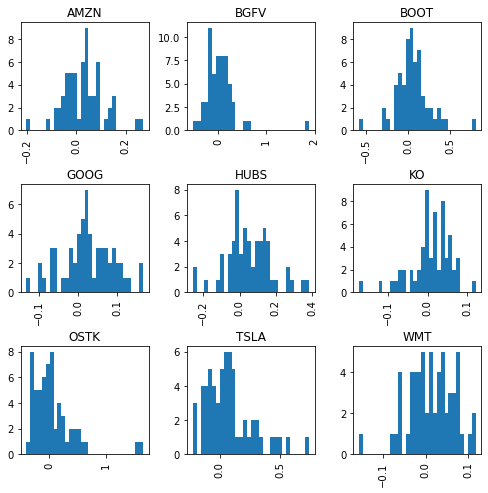

In [5]:
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['figure.dpi'] = 72

returns['monthly.returns'].hist(by=returns['stock'], bins = 30)
plt.pyplot.show()

In [6]:
## Read SchoolDistricts

sd = pd.read_csv('2_DecisionAnalysis_3_SchoolDistricts.csv')
sd.sort_values('District_ID').head(20)

,District_ID,State,County_Name,County_ID,Enrollment,Purchase_Option,Profit,Prob
95,100005,Alabama,Marshall County,1095,5824,Package_A,13475.468710,0.554394
31915,100005,Alabama,Marshall County,1095,5824,Package_C,69334.818870,0.354195
16005,100005,Alabama,Marshall County,1095,5824,Package_B,25000.000000,0.091411
96,100006,Alabama,Marshall County,1095,5764,Package_A,9581.681813,0.502336
16006,100006,Alabama,Marshall County,1095,5764,Package_B,25000.000000,0.155975
31916,100006,Alabama,Marshall County,1095,5764,Package_C,57360.811900,0.341689
31884,100007,Alabama,Jefferson County,1073,14061,Package_C,56723.683580,0.337318
64,100007,Alabama,Jefferson County,1073,14061,Package_A,11556.566900,0.504624
15974,100007,Alabama,Jefferson County,1073,14061,Package_B,25000.000000,0.158058
87,100008,Alabama,Madison County,1089,11695,Package_A,8106.716114,0.493523


In [7]:
## number of School Districts in df
sd['District_ID'].nunique()

15910

In [12]:
## use Numpy average function for EMV.  Apply to grouped df.

emv = lambda x: np.average(x['Profit'], weights = x['Prob'])


sd_summ = sd.groupby('District_ID').apply(emv).to_frame(name = 'emv')
sd_summ.columns = ['emv']
sd_summ.head(20)

C:\Users\elizabeth.mohr\AppData\Local\Temp\ipykernel_23768\3445895373.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sd_summ = sd.groupby('District_ID').apply(emv).to_frame(name = 'emv')


,emv
District_ID,
100005,34314.024639
100006,28312.157798
100007,28917.081132
100008,28583.928386
100011,44348.355365
100012,6488.103634
100013,26487.321633
100030,21155.770239
100060,17721.751500


In [13]:
## define std function based on prob weights in Prob column 
def dist_std(x) :
    wtd_avg = np.average(x['Profit'], weights = x['Prob'])
    dist_var = 0
    for i in x.index:
       obs = ((x['Profit'][i] - wtd_avg)**2) * x['Prob'][i]
       dist_var = dist_var + obs
       dist_std = dist_var ** (.5)
        
    return dist_std

In [14]:
sd_summ['std'] = sd.groupby('District_ID').apply(dist_std)
sd_summ['coefVar'] = sd_summ['std'] / sd_summ['emv']
sd_summ.sort_values(by = 'coefVar').head()

C:\Users\elizabeth.mohr\AppData\Local\Temp\ipykernel_23768\2565589199.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sd_summ['std'] = sd.groupby('District_ID').apply(dist_std)


,emv,std,coefVar
District_ID,,,
4206240,13259.914206,934.632597,0.070486
2632310,8740.573975,642.524123,0.073511
3606300,8473.828558,897.070499,0.105864
4843260,13539.503393,1525.168963,0.112646
5507050,13498.950601,1555.177014,0.115207
